In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from collections import Counter
import os
import sys
import plotly.graph_objects as go
import statsmodels.api as sm
import plotly.express as px
import plotly.io as pio

import statsmodels.api as sm
import random
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

from importlib import reload
import src.utils.utils
reload(src.utils.utils)

# fix random seed for reproducibility
np.random.seed(42)
random.seed(42)

In [4]:
data_folder = './data/'
pickle_folder = data_folder + 'pickle/'
imdb_folder = data_folder + 'IMDB/'
cmu_folder = data_folder + 'CMU/'

In [5]:
with open(pickle_folder+"movies_clean.p", 'rb') as f:
    movies_clean = pickle.load(f)
with open(pickle_folder+"characters_clean.p", 'rb') as f:
    characters_clean = pickle.load(f)

In [9]:
def top_10_(df,feature):
    # top 30 rated movies
    top30_ = df.sort_values(by="averageRating",ascending=False).head(30)
    
    top10 = top30_[[x for x in top30_.columns if x.startswith(feature)]].sum(axis=0).sort_values(ascending=False).head(10)
    return top10

In [6]:
periods = sorted(movies_clean["Year_Interval"].unique())
periods

['1915-1930', '1930-1950', '1950-1970', '1970-2000', '2000-2015']

# 1915-1930 (The Silent Era)

In [7]:
period0 = periods[0]
df_period0 = movies_clean[movies_clean["Year_Interval"] == period0]

/var/folders/gc/k740v3612cv_1m5s2d93wxzr0000gn/T/ipykernel_44270/2168706839.py:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



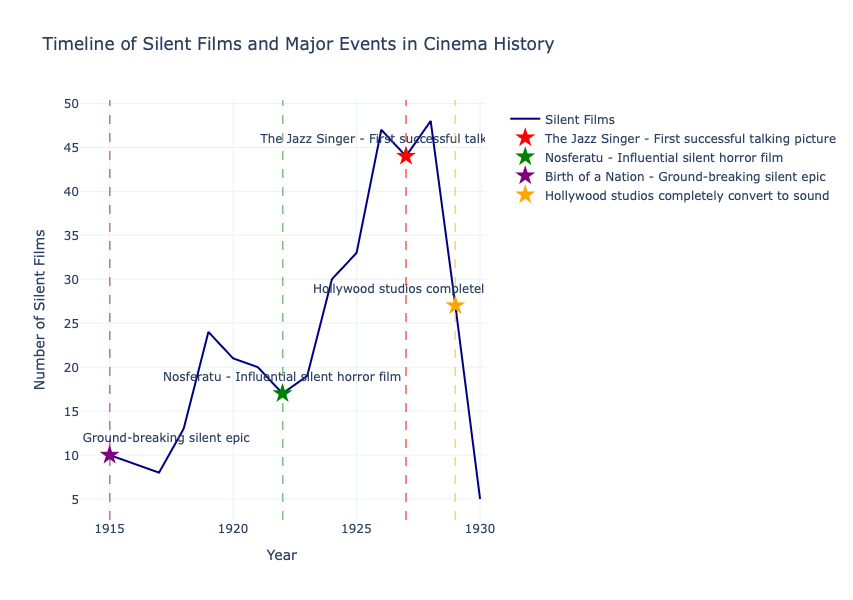

In [12]:
# There is a before and an after "The Jazz Singer" in 1927. The apparition of the sound really changed the
# whole picture for the whole cinema industry

df = pd.DataFrame(df_period0[df_period0["Genre_Silent film"]==True].groupby("Year").apply(lambda x: x["Genre_Silent film"].sum()),columns=["count"]).reset_index()

from plotly.subplots import make_subplots

# Create the events data
events = {
    1927: {'text': 'The Jazz Singer - First successful talking picture', 'color': 'red'},
    1922: {'text': 'Nosferatu - Influential silent horror film', 'color': 'green'},
    1915: {'text': 'Birth of a Nation - Ground-breaking silent epic', 'color': 'purple'},
    1929: {'text': 'Hollywood studios completely convert to sound', 'color': 'orange'}
}

# Create the main line plot
fig = go.Figure()

# Add the silent films line
fig.add_trace(
    go.Scatter(
        x=df['Year'],
        y=df['count'],
        mode='lines',
        name='Silent Films',
        line=dict(color='navy', width=2)
    )
)

# Add event markers
for year, event in events.items():
    fig.add_trace(
        go.Scatter(
            x=[year],
            y=[df[df['Year'] == year]['count'].values[0]],
            mode='markers+text',
            name=event['text'],
            marker=dict(
                symbol='star',
                size=15,
                color=event['color']
            ),
            text=event['text'],
            textposition='top center',
            hoverinfo='text+x+y',
            showlegend=True
        )
    )

# Add vertical lines for events
for year, event in events.items():
    fig.add_vline(
        x=year,
        line_dash="dash",
        line_color=event['color'],
        opacity=0.5
    )

# Update layout
fig.update_layout(
    title='Timeline of Silent Films and Major Events in Cinema History',
    xaxis_title='Year',
    yaxis_title='Number of Silent Films',
    hovermode='closest',
    template='plotly_white',
    showlegend=True,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.05
    ),
    margin=dict(r=200)  # Add right margin for legend
)

# Make it responsive
fig.update_layout(
    autosize=True,
    width=1000,
    height=600
)

# Show the plot
fig.show()

Top 10 most frequent genres in the 30 highest-rated movies :


Genre_Drama              27
Genre_Black-and-white    27
Genre_Silent film        26
Genre_Indie              21
Genre_Other              15
Genre_Comedy              9
Genre_World cinema        8
Genre_Romance Film        8
Genre_War film            7
Genre_Romantic comedy     5
dtype: int64

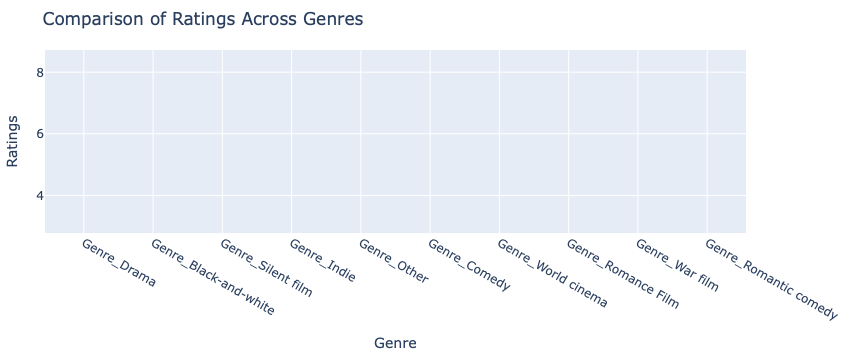

In [10]:
# Silent films compose the major part of this period. However, with the thanks to the apparition of the 
# first "talkies" and sound in cinema, there is the emergence of established genres like Drama, comedy 
# or musical.
# The World Cinema genre is highly rated during 1915-1930 due to groundbreaking innovations and especially 
# the rise of talkies, which transformed storytelling, and the emergence of unique cinematic styles.
print("Top 10 most frequent genres in the 30 highest-rated movies :")
top = top_10_(df_period0,'Genre_')
display(top)

df = df_period0[[x for x in top.index.to_list()]+['averageRating']]
# Melt the dataset to a long format for easier visualization
df_long = df.melt(id_vars=['averageRating'], 
                  value_vars=[x for x in top.index.to_list()], 
                  var_name="Genre", 
                  value_name="Belongs_To_Genre")

# Filter only rows where the movie belongs to a genre (value == 1)
df_long = df_long[df_long["Belongs_To_Genre"] == True]

# Create the scatter plot
fig = px.scatter( df_long, x="Genre", y="averageRating", color="Genre", title="Comparison of Ratings Across Genres", labels={"averageRating": "Ratings", "Genre": "Genre"}, hover_data=["averageRating"] )

# Update layout for better aesthetics
fig.update_layout(showlegend=False, margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [13]:
# plot mean_age qui augmente a partir de 1927

In [15]:
# Enhanced Visualization Here:
# A bar plot with matched data showing the probability of being cast as an actor (male versus female) when
# controlling for age, genre, and lead roles.
# Key Insight: After matching, the disparity decreases slightly, suggesting that societal norms and 
# industry bias played a significant role in the overrepresentation of male actors, above and beyond other
# factors like age or genre preferences.

In [16]:
# Visualization Here:
# A bar chart comparing the number of silent films to talkies by year from 1915–1930, showing the sharp rise
# in talkies starting in 1927.